# Glass Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

In [2]:
df = pd.read_csv("./DataSets/glass.csv")
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


### Features in data

In [3]:
cols = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
target = ["Type"]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


## Exploratory Data Analysis and Data Pre-processing

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


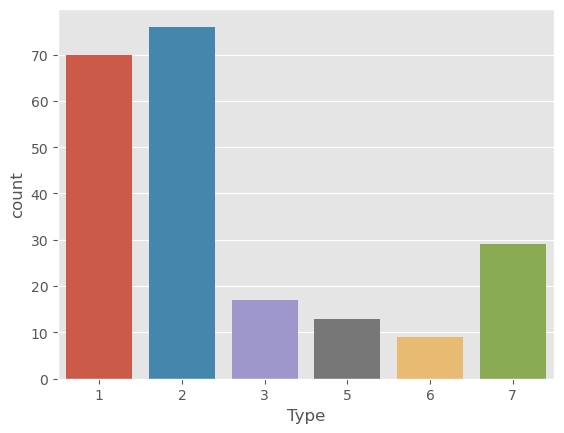

In [6]:
sns.countplot(df["Type"])
plt.show()

### Checking distribution of the features

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


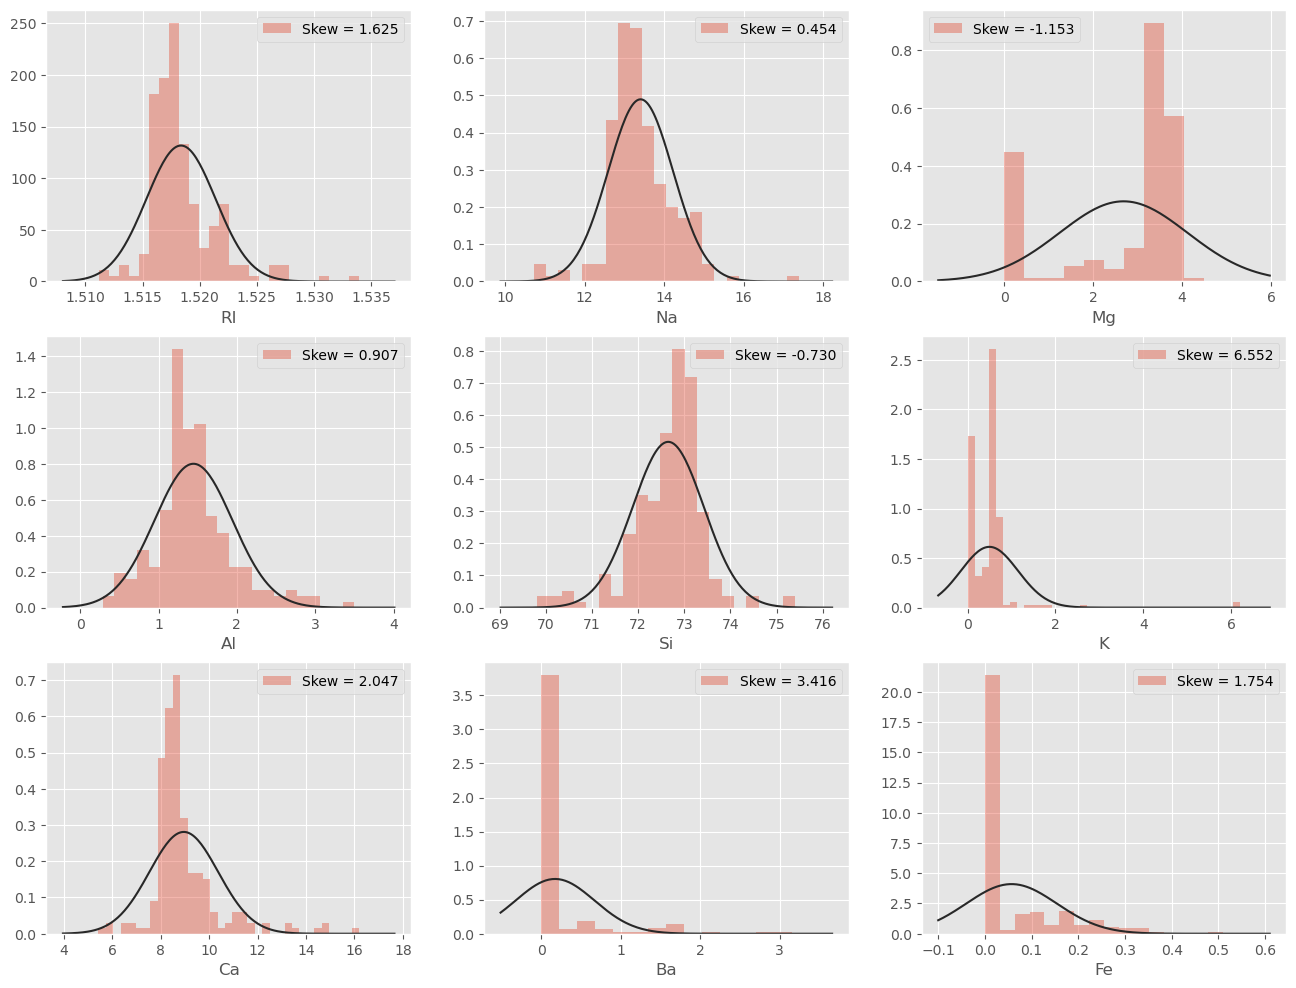

In [7]:
fig,ax = plt.subplots(3,3, figsize=(16, 12))
ax = ax.flatten()
i = 0
for col in cols:
    skew = df[col].skew()
    sns.distplot(df[col], ax = ax[i], fit= stats.norm, kde=False, label='Skew = %.3f' %(skew))
    ax[i].legend(loc='best')
    i += 1
plt.show()

### Univariate Box Plot

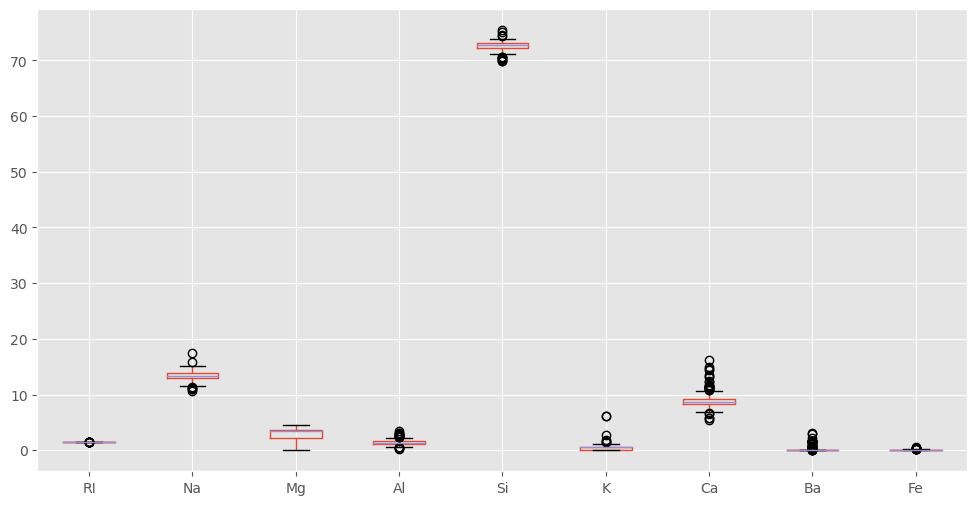

In [8]:
df.iloc[:,:-1].boxplot(figsize=(12,6))
plt.show()

*Inference*
- Silicon is the main component of Glass making more than 70% of composition
- Combined Silicon, Sodium and Calcium make up around 90%
- Iron is the least important component

### Bivariate Box plots

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\USER\anaconda3\l

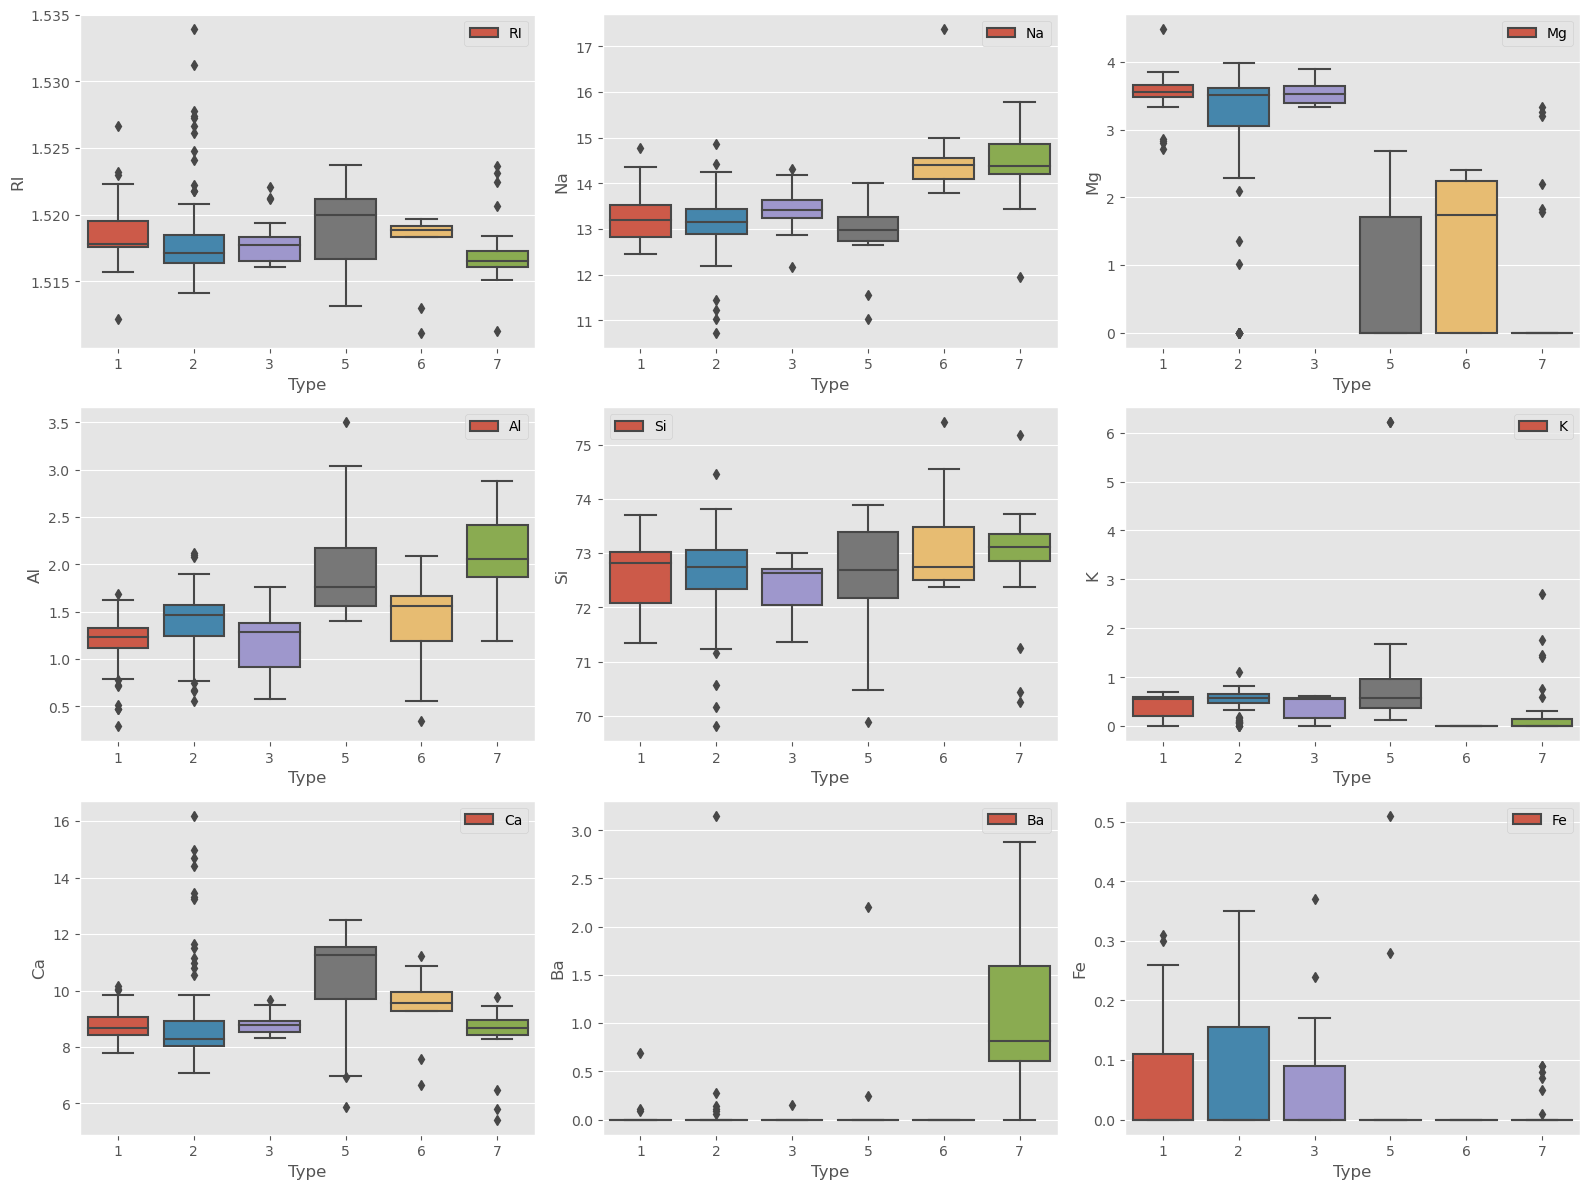

In [9]:
fig,ax = plt.subplots(3,3, figsize=(16, 12))
ax = ax.flatten()
i = 0
for col in cols:
    sns.boxplot("Type", col, ax = ax[i], data=df)
    ax[i].legend([col], loc='best')
    i += 1
plt.tight_layout()
plt.show()

*Inferences*
- Refractive index lies between 1.51 and 1.54
- Type 6 and 7 have higher Na %
- Type 1,2 and 3 have higher Mg %
- Type 5 and 7 have higher Al %
- Si % is similar in all types
- Type 6 has no K composition
- Type 5 and 6 have higher Ca composition
- Ba is mostly used in Type 7
- Fe is used in Type 1,2 and 3

### Scatter Matrix

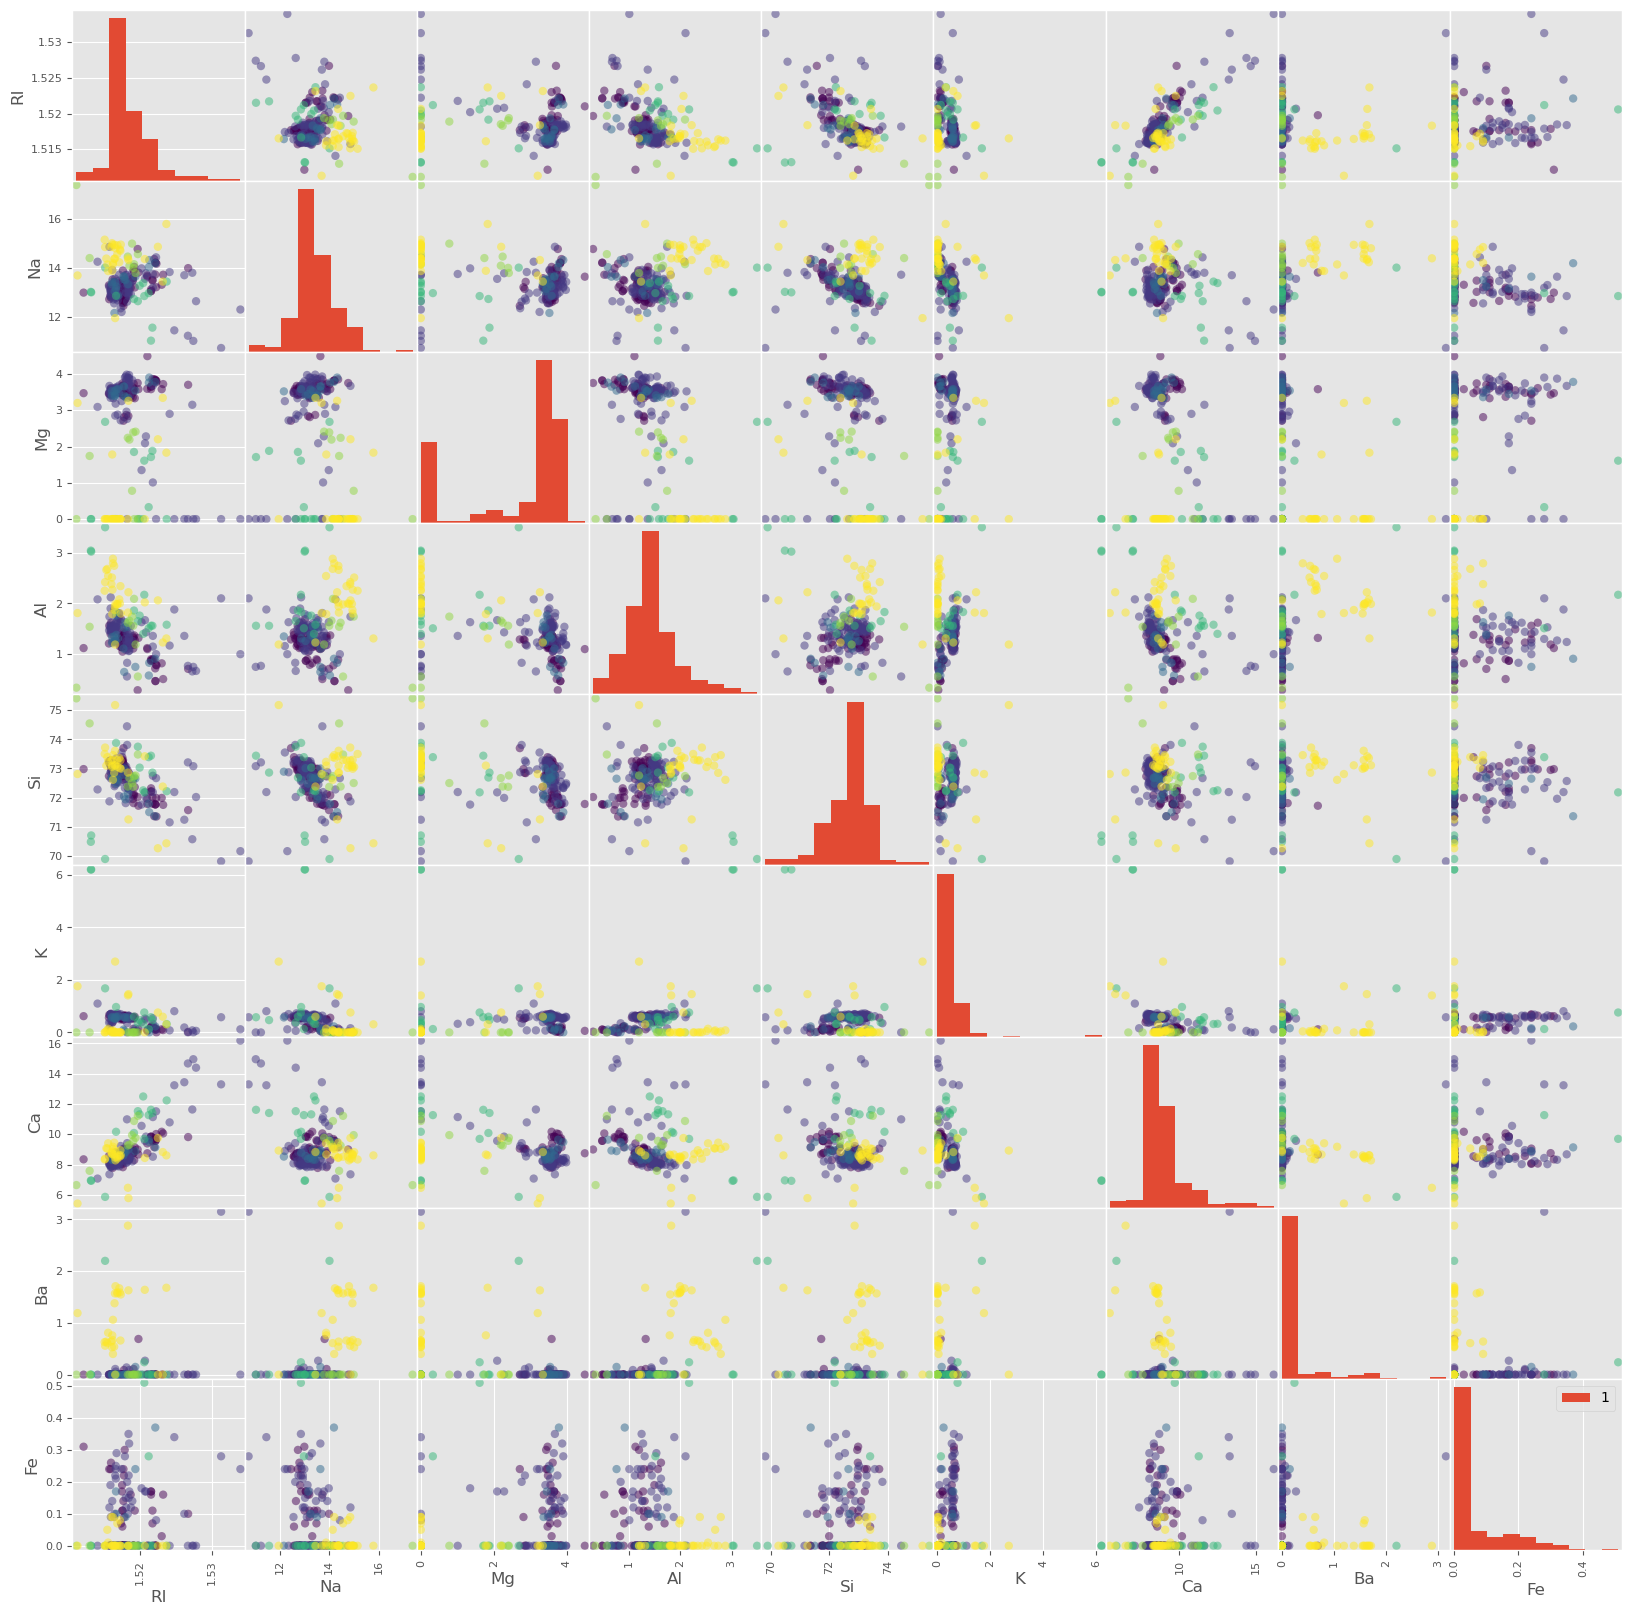

In [10]:
pd.plotting.scatter_matrix(df.iloc[:,:-1], c=df.iloc[:,-1], figsize=(20, 20), marker='o')
plt.legend(df["Type"].unique())
plt.show()

### Pairplot

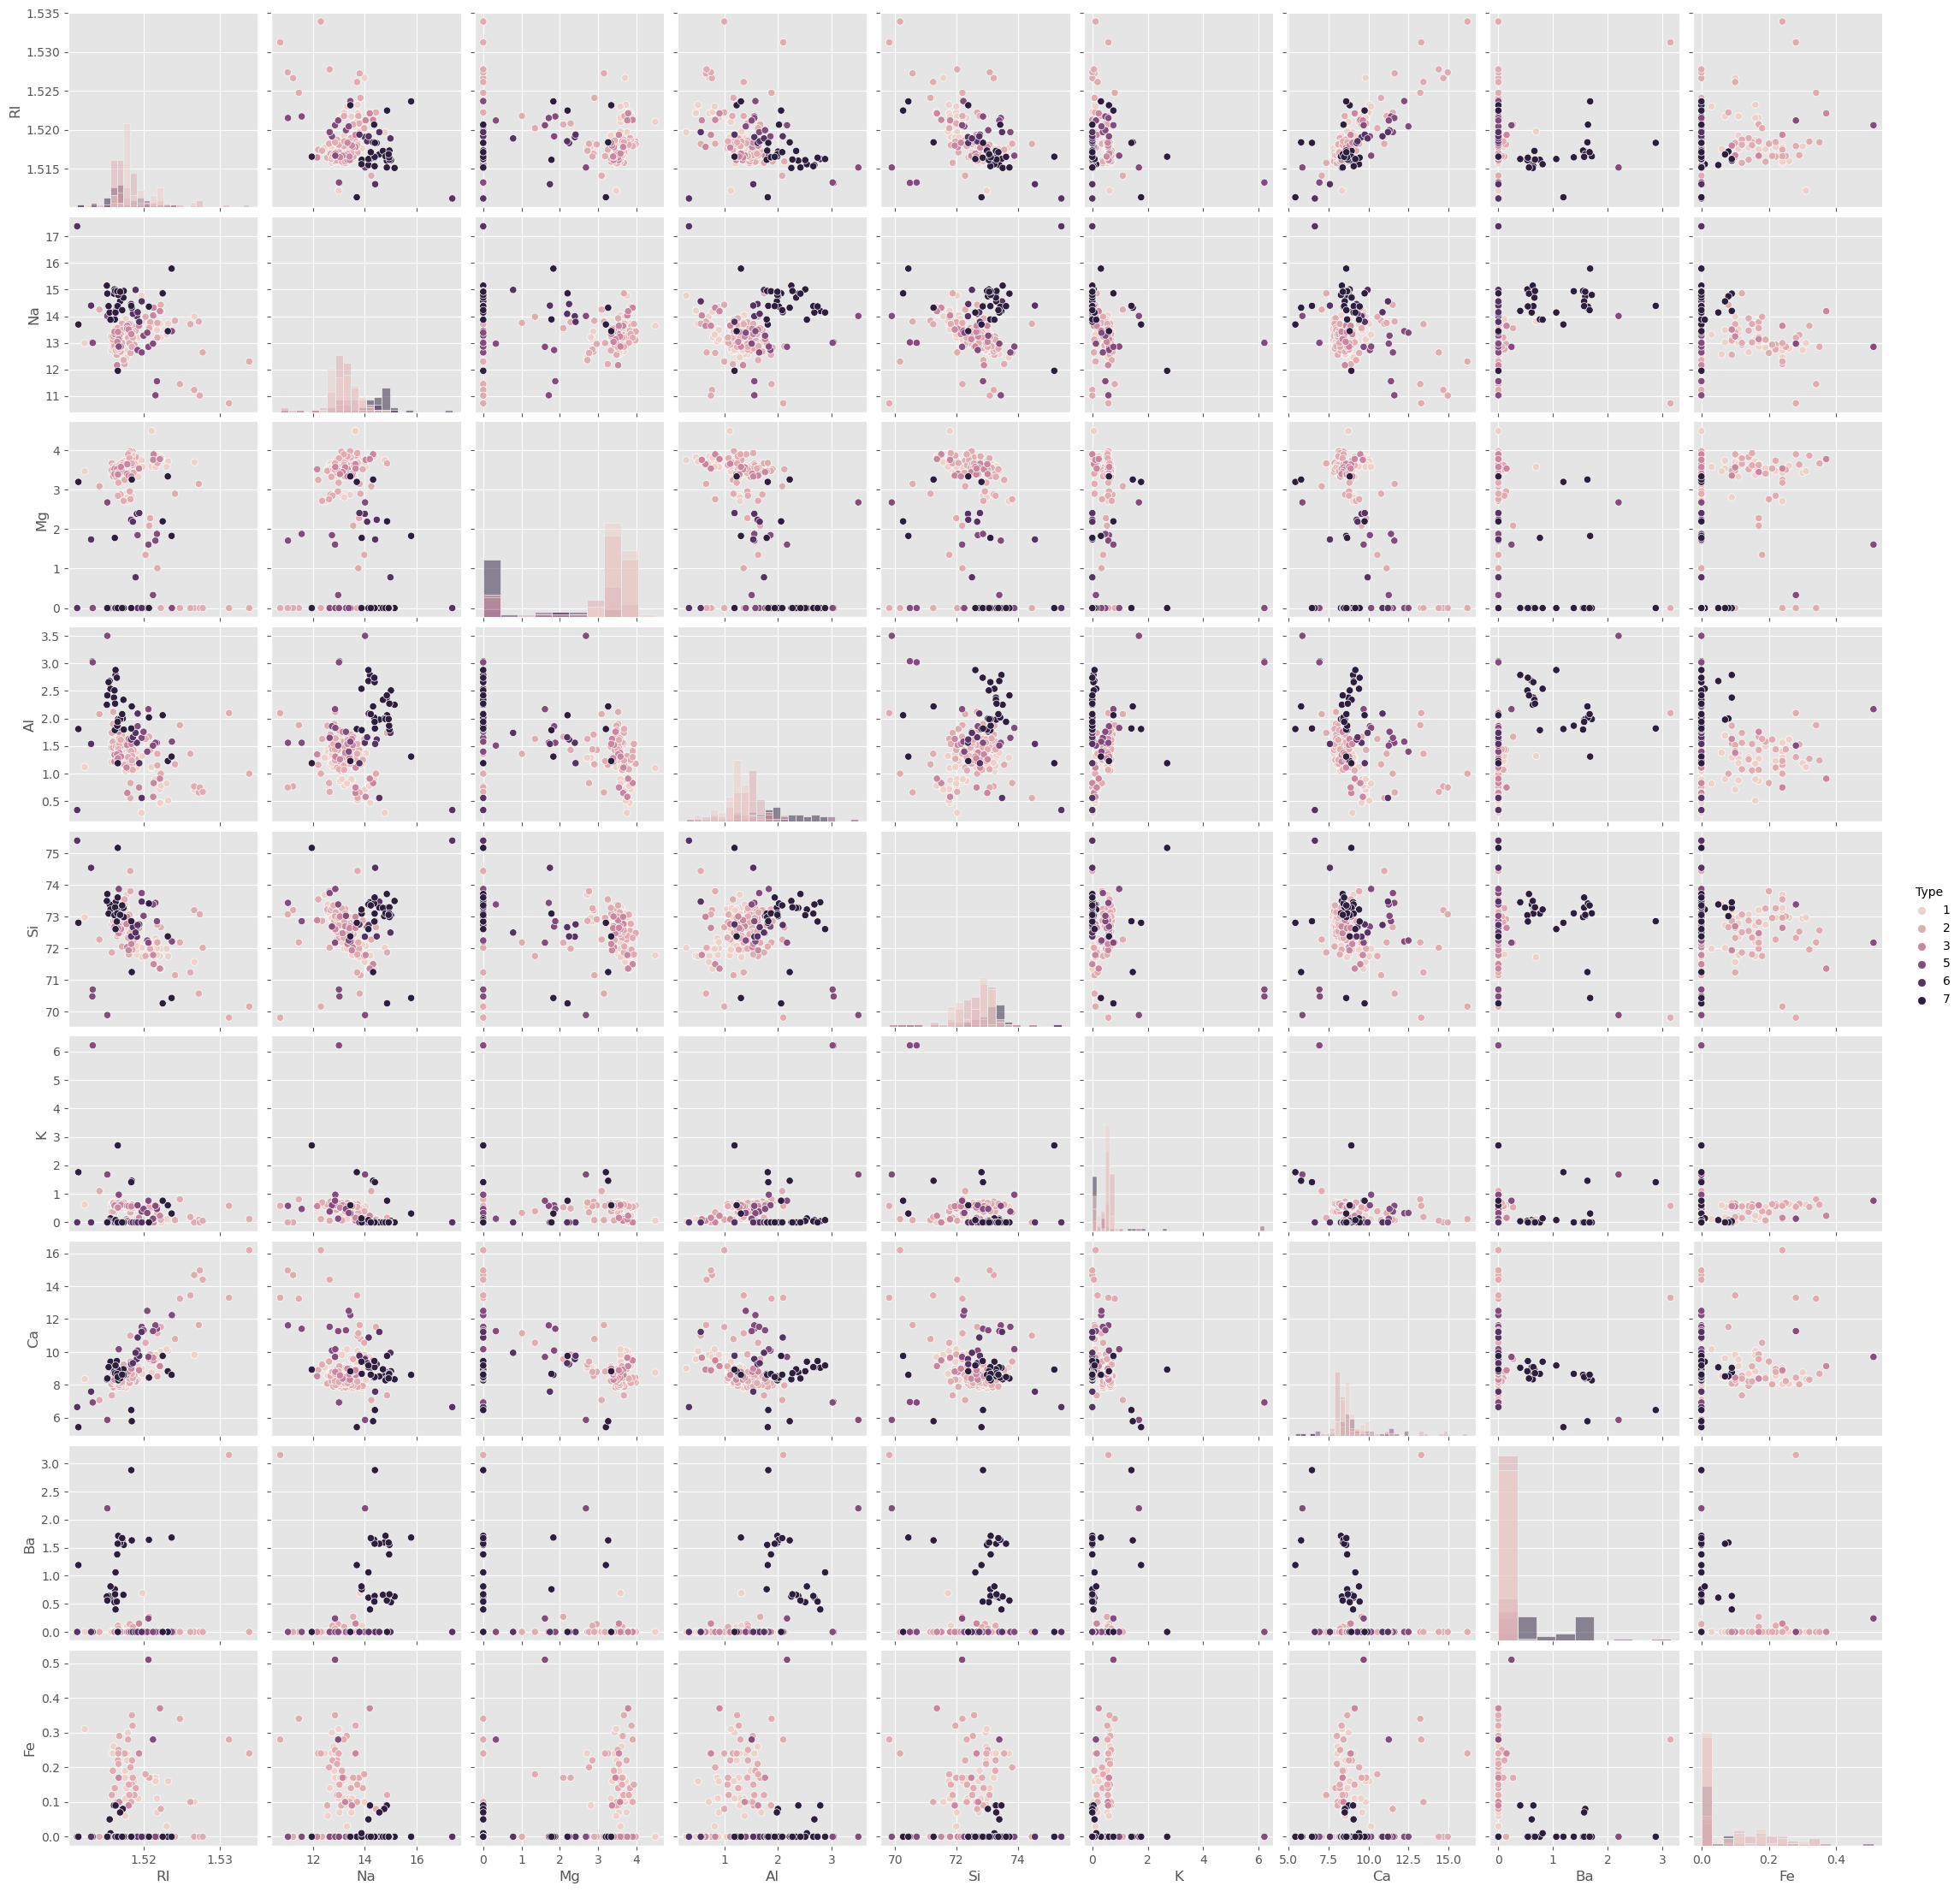

In [11]:
sns.pairplot(df, hue='Type', diag_kind='hist')
plt.show()

### Correlation Plot

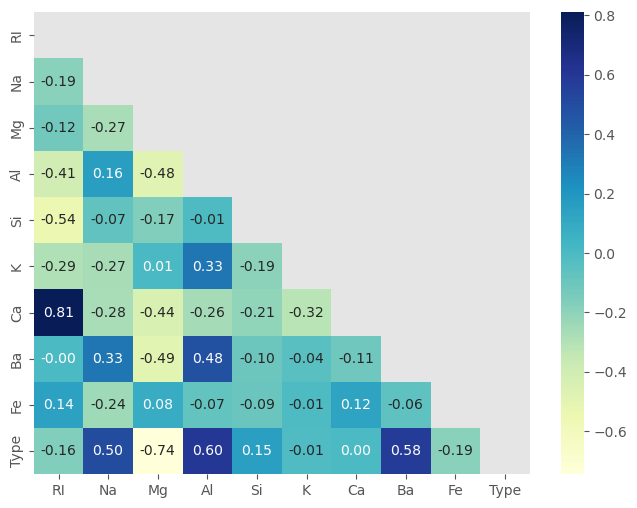

In [12]:
plt.figure(figsize=(8,6))
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, annot=True, fmt= '.2f', cmap='YlGnBu', mask=mask)
plt.show()

*Inference* 
- K and Ca have no correlation with Type, which means for some type it maybe high for some low causing cancelling effect

### Feature Engineering - Based on the mean of K and Ca in classes

In [13]:
df.groupby("Type")["Ca"].mean()

Type
1     8.797286
2     9.073684
3     8.782941
5    10.123846
6     9.356667
7     8.491379
Name: Ca, dtype: float64

In [14]:
df.groupby("Type")["K"].mean()

Type
1    0.447429
2    0.521053
3    0.406471
5    1.470000
6    0.000000
7    0.325172
Name: K, dtype: float64

In [15]:
df["Ca_morethan9"] = np.where(df["Ca"]>9, 1, 0)
df["K_morethandot7"] = np.where(df["K"]>0.7, 1, 0)
df["K_lessthandot4"] = np.where(df["K"]<0.4, 1, 0)

In [16]:
cols.append("Ca_morethan9")
cols.append("K_morethandot7")
cols.append("K_lessthandot4")

### Statistical Importance Check for Variable

In [17]:
import statsmodels.api as sm
import statsmodels.stats as sms

for col in cols:
    data = sm.formula.ols(col+"~ Type", data=df).fit()
    pval = sms.anova.anova_lm(data)["PR(>F)"][0]
    print(f"Pval for {col}: {pval}")

Pval for RI: 0.01617845580602059
Pval for Na: 4.061873356970488e-15
Pval for Mg: 3.882994616347279e-39
Pval for Al: 3.260809469465602e-22
Pval for Si: 0.026619910104702084
Pval for K: 0.8837426923094064
Pval for Ca: 0.988951038703045
Pval for Ba: 3.038430172779735e-20
Pval for Fe: 0.00572930035138181
Pval for Ca_morethan9: 0.07403949750207983
Pval for K_morethandot7: 0.00010657536300298503
Pval for K_lessthandot4: 2.377474211882533e-09


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score

## Splitting the data

In [19]:
X = df.drop('Type', axis=1)
y = df['Type']

scaler = RobustScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [20]:
X

array([[ 1.26375712,  0.37057221,  0.68013468, ...,  0.        ,
         0.        ,  1.        ],
       [-0.02656546,  0.64305177,  0.08080808, ...,  0.        ,
         0.        ,  0.        ],
       [-0.56925996,  0.2506812 ,  0.04713805, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.12713472,  1.15531335, -2.34343434, ...,  0.        ,
         0.        ,  1.        ],
       [-0.44402277,  1.17711172, -2.34343434, ...,  0.        ,
         0.        ,  1.        ],
       [-0.21631879,  1.01362398, -2.34343434, ...,  0.        ,
         0.        ,  1.        ]])

In [21]:
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

## Model Building and Comparison Analysis

###  Using Logistic Regression

Accuracy Score of Logistic Regression : 0.6511627906976745


C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Type', ylabel='Density'>

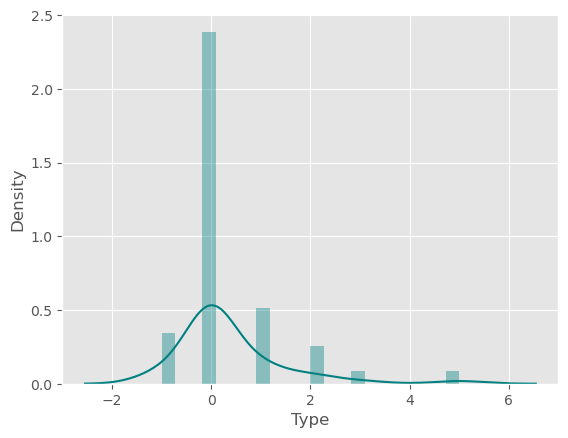

In [22]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred1 = logreg.predict(X_test)
score_logreg = accuracy_score(y_pred1, y_test)

print('Accuracy Score of Logistic Regression :', score_logreg)
sns.distplot(y_test-y_pred1, color='teal')

### Using Random Forest Classifier

Accuracy Score of Random Forest Classifier : 0.7441860465116279


C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Type', ylabel='Density'>

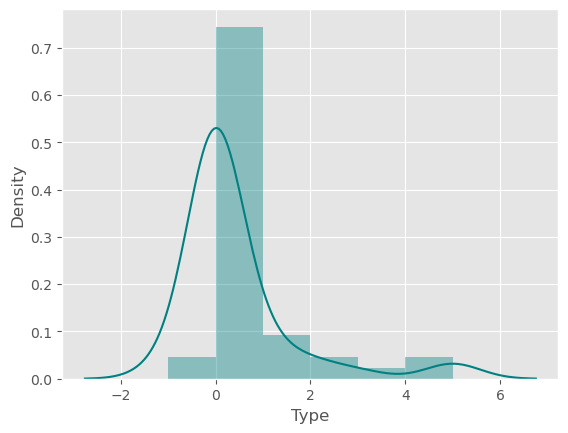

In [23]:
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_train, y_train)
y_pred2 = rf.predict(X_test)
score_rf = accuracy_score(y_pred2, y_test)

print('Accuracy Score of Random Forest Classifier :', score_rf)
sns.distplot(y_test-y_pred2, color='teal')

### Using Gradient Boost

Accuracy Score of Gradient Boosting Classifier : 0.7209302325581395


C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Type', ylabel='Density'>

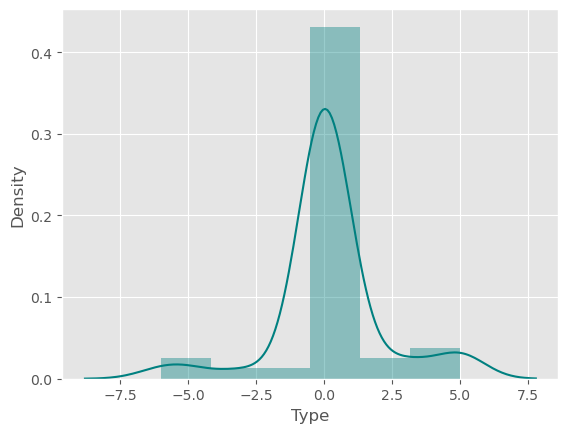

In [24]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
y_pred3 = gbc.predict(X_test)
score_gbc = accuracy_score(y_pred3, y_test)

print('Accuracy Score of Gradient Boosting Classifier :', score_gbc)
sns.distplot(y_test-y_pred3, color='teal')

### Using Decision tree Classifier

Accuracy Score of Decision Tree Classifier : 0.6511627906976745


C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Type', ylabel='Density'>

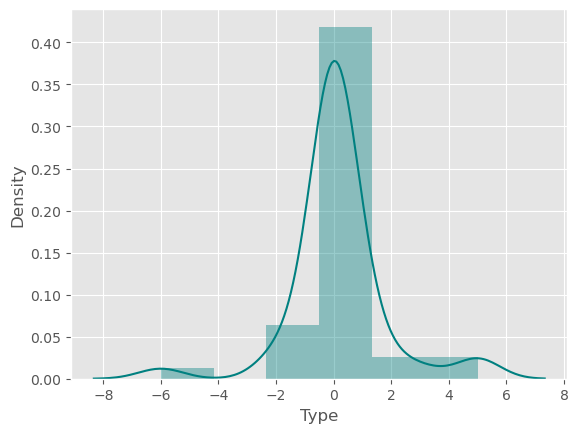

In [25]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred4 = dt.predict(X_test)
score_dt = accuracy_score(y_pred4, y_test)

print('Accuracy Score of Decision Tree Classifier :', score_dt)
sns.distplot(y_test-y_pred4, color='teal')

### Using KNN

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy Score of K-Nearest Neighbors Classifier :  0.6976744186046512


C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

<AxesSubplot:xlabel='Type', ylabel='Density'>

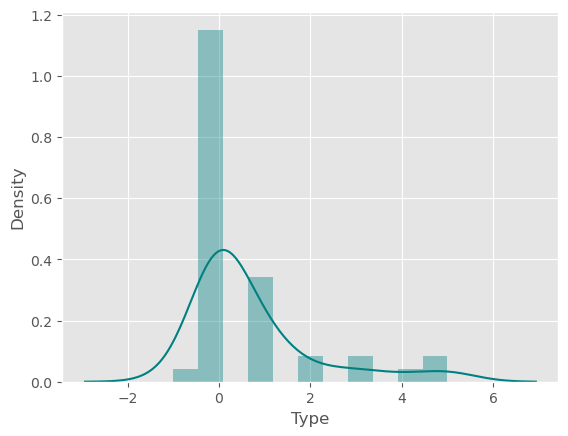

In [26]:
accuracy = []

for i in range(1, 11):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(X_train, y_train)
    y_pred5 = model.predict(X_test)
    accuracy.append(model.score(X_test, y_test))

score_knn = max(accuracy)
print('Accuracy Score of K-Nearest Neighbors Classifier : ', score_knn)
sns.distplot(y_test-y_pred5, color='teal')

### Using Support Vector Classifier

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Accuracy Score of Support Vector Classifier : 0.6976744186046512


<AxesSubplot:xlabel='Type', ylabel='Density'>

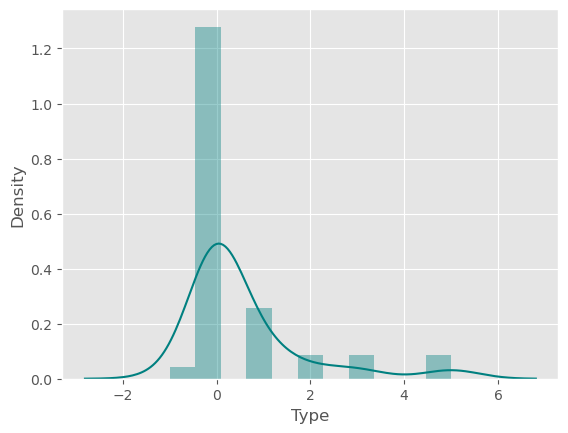

In [27]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred6 = svm.predict(X_test)
score_svm = accuracy_score(y_pred6, y_test)

print('Accuracy Score of Support Vector Classifier :', score_svm)
sns.distplot(y_test-y_pred6, color='teal')

In [28]:
pd.DataFrame({'Model' : ['Logistic Regression', 'RandomForest', 'Gradient Boosting', 
                         'Decision Tree', 'K-Nearest Neighbors', 'Support Vector Classifier'],
             'Score' : [score_logreg, score_rf, score_gbc, score_dt, score_knn, score_svm]})

,Model,Score
0,Logistic Regression,0.651163
1,RandomForest,0.744186
2,Gradient Boosting,0.720930
3,Decision Tree,0.651163
4,K-Nearest Neighbors,0.697674
5,Support Vector Classifier,0.697674


# Conclusion
Random Forest Classifier gives the best results with a score around 74%.

In [32]:
import pickle

file = open('rf_model.pkl','wb')
pickle.dump(rf, file)

### Build a Keras Sequential model 
    

In [34]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical, normalize

df = pd.read_csv('./DataSets/glass.csv')

X_train = df.drop('Type', axis = 1)
X_train = df.values
X_train = normalize(X_train)


y_train = df['Type']
y_train = to_categorical(y_train)


X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size = 0.5)

In [35]:
from tensorflow.keras.optimizers import Adam


model = tf.keras.models.Sequential([
       
    tf.keras.layers.Dense(256, input_shape=(10,), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
            
    tf.keras.layers.Dense(8, activation='softmax')
])


model.compile(loss='categorical_crossentropy',
              optimizer=Adam(0.0001),
              metrics=['acc'])

model

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2816      
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 256)               0

In [37]:
history = model.fit(X_train, y_train,
                    epochs=60,
                    batch_size=6,
                    validation_data=(X_val, y_val),
                    verbose=1,
                   )

Epoch 1/60
29/29 [==============================] - 2s 12ms/step - loss: 3.2981 - acc: 0.1754 - val_loss: 2.0792 - val_acc: 0.0000e+00
Epoch 2/60
29/29 [==============================] - 0s 4ms/step - loss: 2.5261 - acc: 0.2982 - val_loss: 2.0548 - val_acc: 0.0000e+00
Epoch 3/60
29/29 [==============================] - 0s 4ms/step - loss: 2.2502 - acc: 0.2865 - val_loss: 2.0275 - val_acc: 0.0000e+00
Epoch 4/60
29/29 [==============================] - 0s 4ms/step - loss: 1.9107 - acc: 0.3918 - val_loss: 1.9904 - val_acc: 0.2857
Epoch 5/60
29/29 [==============================] - 0s 5ms/step - loss: 2.0688 - acc: 0.3977 - val_loss: 1.9627 - val_acc: 0.2857
Epoch 6/60
29/29 [==============================] - 0s 4ms/step - loss: 1.7612 - acc: 0.4795 - val_loss: 1.9446 - val_acc: 0.2857
Epoch 7/60
29/29 [==============================] - 0s 4ms/step - loss: 1.5235 - acc: 0.5439 - val_loss: 1.9245 - val_acc: 0.2857
Epoch 8/60
29/29 [==============================] - 0s 5ms/step - loss: 1.686

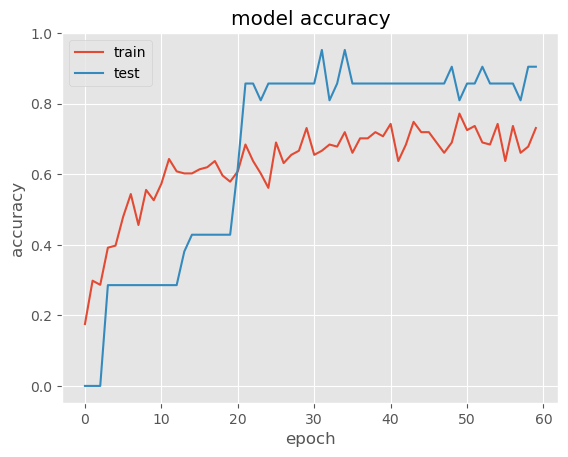

In [38]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [39]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 24ms/step - loss: 0.2179 - acc: 0.9091


[0.21785877645015717, 0.9090909361839294]

In [41]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
y_pred_cl = np.argmax(y_pred, axis = 1)
y_true = np.argmax(y_test, axis = 1)

confusion_matrix(y_true, y_pred_cl)

1/1 [==============================] - 0s 20ms/step


array([[14,  0,  0,  0],
       [ 0,  4,  0,  0],
       [ 0,  2,  0,  0],
       [ 0,  0,  0,  2]], dtype=int64)